# Classifying Movie Scripts : Predict The Movie Genre
---

<img src="https://www.machinehack.com/wp-content/uploads/2020/03/Movie_scripts_Banner-scaled.jpg" style="width:100%;height=900px"/>

### Problem Statement : Predict the genre of a movie from its script.

### Data

* Train.csv – 1978 script file names with the class labels.
* Test.csv – 849 script file names without the class labels.
* Scripts – Folder with 2827 scripts .txt files.
* Sample Submission – Sample format for the submission.

**Download the data from MachineHack**

<h3 style="color:#ff4782;">Contents</h3>

___

* <h4 style="color:#ff4782;">1. Understanding the problem</h4>
* <h4 style="color:#ff4782;">2. Data Analysis</h4>
<h5 style="color:#ff4782;">--- 2.1. Distribution Of Classes</h5>
<h5 style="color:#ff4782;">--- 2.2. Feature Engineering</h5>
* <h4 style="color:#ff4782;">3. Data Preprocessing</h4>
<h5 style="color:#ff4782;">--- 3.1. TF-IDF Vectorizer</h5>
* <h4 style="color:#ff4782;">4. Training & Validation</h4>
* <h4 style="color:#ff4782;">5. Predicting For Test Data</h4>
<h5 style="color:#ff4782;">--- 5.1. Predicting With Engineered Feature</h5>
---

<h2 style="color:#ff4782;">1. Understanding the problem</h2>

---
We are provided with two csv files and a directory with 2827 text files as the datasets for this problem. Lets have a look at these datasets.

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
#loading the datasets

data_path = "/Users/amalnair/Documents/Amal-WorkSpace/MachineHack_Competitions/MovieScriptsClassification/Data"

train = pd.read_csv(data_path + os.sep + "Train.csv")
test = pd.read_csv(data_path + os.sep + "Test.csv")


scripts_path = data_path + os.sep + "Scripts"

In [3]:
train.head(5)

,File_Name,Labels
0,file_2180.txt,8
1,file_693.txt,4
2,file_2469.txt,6
3,file_2542.txt,6
4,file_378.txt,16


In [4]:
test.head(5)

,File_Name
0,file_2300.txt
1,file_809.txt
2,file_1383.txt
3,file_983.txt
4,file_1713.txt


In [5]:
os.listdir(scripts_path)

['file_2164.txt',
 'file_2602.txt',
 'file_339.txt',
 'file_2616.txt',
 'file_1479.txt',
 'file_2170.txt',
 'file_1451.txt',
 'file_2158.txt',
 'file_477.txt',
 'file_311.txt',
 ...]

In [6]:
len(os.listdir(scripts_path))

2827

In [7]:
#Looking inside a script file
print("File Name : ", train['File_Name'].values[0])
print("-"*60)
print("Length of content : ", len(open(scripts_path + os.sep + train['File_Name'].values[0], "r").read()))
print("-"*60)
print(open(scripts_path + os.sep + train['File_Name'].values[0], "r").read())

File Name :  file_2180.txt
------------------------------------------------------------
Length of content :  68093
------------------------------------------------------------
			Crouching Tiger, Hidden Dragon

				by

	Wang Hui Ling, James Schamus, Tsai Kuo Jung

				based on the novel by

				Wang Du Lu

EXT. YUAN COMPOUND - DAY

Security men and porters are loading wagons for a convoy.

As they work, we see across the lake a lone horseman entering

the village.  One of the men recognizes him.

				WORKER

		Master Li is here!

ANGLE ON: Li Mu Bai, thirties, powerful and handsome.

In the background, old Aunt Wu, at the sight of Li Mu Bai,

drops her parcels and runs excitedly into the building.

INT. YUAN HALLWAY - DAY

Aunt Wu runs hurriedly through the halls.

				AUNT WU

		Shu Lien!

   .....  

---
<h3 style="color:#d000ff">Key Observations:</h3>

* **We are dealing with textual data**
* **The target vatiable is a class called Labels**
* **The objective is to classify textual data in to a category**
* **This is an NLP (Natural Language Processing) challenge**
___

In [8]:
# Loading the scripts to dataframe
train['Script'] = [open(scripts_path + os.sep + file, "r").read() for file in train['File_Name']]
test['Script'] = [open(scripts_path + os.sep + file, "r").read() for file in test['File_Name']]

In [9]:
train

,File_Name,Labels,Script
0,file_2180.txt,8,"\t\t\tCrouching Tiger, Hidden Dragon\n\n\t\t\t..."
1,file_693.txt,4,"""MUMFO..."
2,file_2469.txt,6,MAX PAYNE\n\n ...
3,file_2542.txt,6,SLUMDOG MILLIONAIRE\n\n ...
4,file_378.txt,16,<b><!--\n\n</b>if (window!= top)\n\ntop.locati...
...,...,...,...
1973,file_1930.txt,19,SURROGATES\n...
1974,file_1821.txt,19,CRADLE TO THE GRAVE\n\n Written by...
1975,file_350.txt,16,"""HIGHLANDER IV: WORLD WITHOUT END"" -- Draft 9/..."
1976,file_1933.txt,19,Misery - by William Goldman\n\n<b><!--\n\n</b>...


In [10]:
test

,File_Name,Script
0,file_2300.txt,MARTHA MARCY MAY ...
1,file_809.txt,YES MAN\n\n ...
2,file_1383.txt,Star Trek: The Wrath Of Khan\n\n ...
3,file_983.txt,The Beach\n\nThe Beach\n\nWritten by John Hodg...
4,file_1713.txt,KING...
...,...,...
844,file_2474.txt,AUTUMN IN ...
845,file_863.txt,<b><!--\n\n</b>if (window!= top)\n\ntop.locati...
846,file_1547.txt,TROPIC THUNDE...
847,file_1292.txt,NIGHTBR...


<h2 style="color:#ff4782;">2. Data Analysis</h2>

---
Now that we have the required data loaded, we can analyse the data. Data analysis is an integral stage of machine learning pipeline. It shows us how to engineer and perfect a model by preparing and curating the right information from the data.

Data Analysis helps us in generating new features that might help us in building a stronger predictor

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 3 columns):
File_Name    1978 non-null object
Labels       1978 non-null int64
Script       1978 non-null object
dtypes: int64(1), object(2)
memory usage: 46.5+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 2 columns):
File_Name    849 non-null object
Script       849 non-null object
dtypes: object(2)
memory usage: 13.4+ KB


---
<h3 style="color:#d000ff">Key Observations:</h3>

* **We do not have any null/missing/nan values in the datasets**
* **The target variable "Label" is of data type integer**
* **The independent variable Script is of type object**
___

<h3 style="color:#ff4782;">2.1. Distribution Of Classes</h3>


In [13]:
#training set

print("Unique number of classes in train : ", train['Labels'].nunique())

Unique number of classes in train :  22


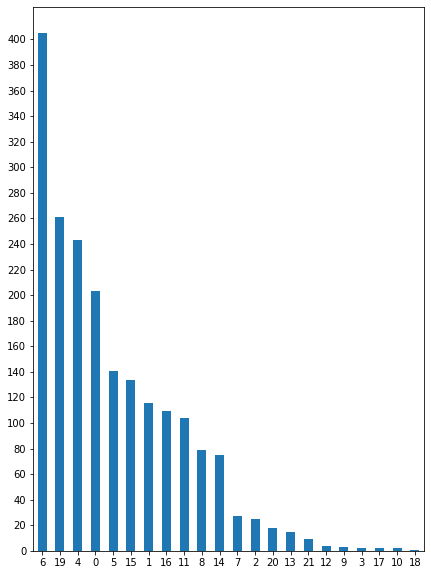

In [14]:
train['Labels'].value_counts().plot(kind = 'bar',figsize=(7,10), rot=0, yticks=range(0,420,20))

<h3 style="color:#ff4782;">2.2. Feature Engineering</h3>

---

Feature engineering is a fancy term for deriving new features from the existing features. This is part of the exploration strategy that might help us in getting that extra .01% accuracy which in most cases are highly crucial for an ML model.

Let us see how the length of each script contributes in identifying the genre of a movie. This may not seem logical to us. We may think that these are movie scripts and all most all movies have the same stream length. However, there can be a correlation that machines can easily relate. We will explore this by using the feature to predict and compare the model's prediction.

In [15]:
train["Script_Length"] = train['Script'].apply(lambda x: len(x))
test["Script_Length"] = test['Script'].apply(lambda x: len(x))

In [16]:
train

,File_Name,Labels,Script,Script_Length
0,file_2180.txt,8,"\t\t\tCrouching Tiger, Hidden Dragon\n\n\t\t\t...",68093
1,file_693.txt,4,"""MUMFO...",277113
2,file_2469.txt,6,MAX PAYNE\n\n ...,209267
3,file_2542.txt,6,SLUMDOG MILLIONAIRE\n\n ...,254917
4,file_378.txt,16,<b><!--\n\n</b>if (window!= top)\n\ntop.locati...,244016
...,...,...,...,...
1973,file_1930.txt,19,SURROGATES\n...,207622
1974,file_1821.txt,19,CRADLE TO THE GRAVE\n\n Written by...,144137
1975,file_350.txt,16,"""HIGHLANDER IV: WORLD WITHOUT END"" -- Draft 9/...",110293
1976,file_1933.txt,19,Misery - by William Goldman\n\n<b><!--\n\n</b>...,236460


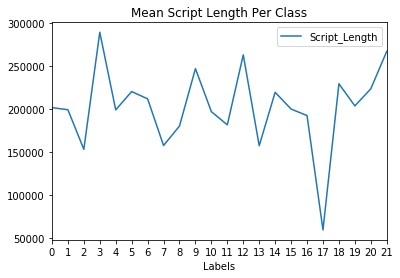

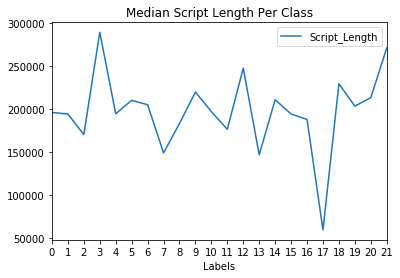

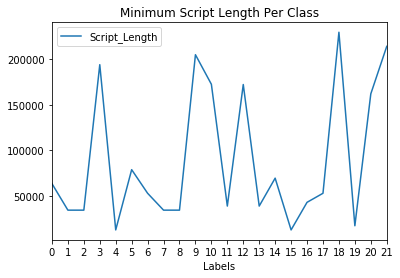

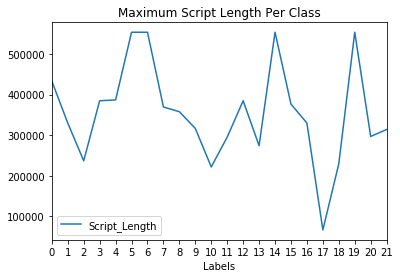

In [17]:
train.groupby('Labels').mean().plot(kind='line', xticks = range(0,22,1), rot = 0, title="Mean Script Length Per Class")
train.groupby('Labels').median().plot(kind='line', xticks = range(0,22,1), rot = 0, title="Median Script Length Per Class")
train.groupby('Labels').min().plot(kind='line', xticks = range(0,22,1), rot = 0, title="Minimum Script Length Per Class")
train.groupby('Labels').max().plot(kind='line', xticks = range(0,22,1), rot = 0, title="Maximum Script Length Per Class")

---
<h3 style="color:#d000ff">Key Observations:</h3>

* Although we can see some correlation between labels and the length of script, we can not make a clear conclusion abput the feature being help ful in giving us a better accuracy
___

<h2 style="color:#ff4782;">3. Data Preprocessing</h2>

In [18]:
train['Labels'].value_counts()

6     405
19    261
4     243
0     203
5     141
15    134
1     116
16    109
11    104
8      79
14     75
7      27
2      25
20     18
13     15
21      9
12      4
9       3
3       2
17      2
10      2
18      1
Name: Labels, dtype: int64

---
<h3 style="color:#d000ff">Important Note:</h3>

* We can see that the label 18 has only one script in the training set. Since this is a multi-class classification problem we will need to perform a stratified split of training set to create a validation set.

* A stratified split enables a balanced distribution of samples per Label(Class) between the train and validation sets.

* In order to perform a stratified split, it is required that each of the classes must have atleast two samples each.

**Since label 18 doesn't meet this requirement we will temporarily delete this data while creating the validation set. We will only use this data while training the model.**
___

In [19]:
# Creating training and validation data
from sklearn.model_selection import train_test_split

temp = train.drop(train[train['Labels'] == 18].index[0], axis = 0)

xtrain, xvalid, ytrain, yvalid = train_test_split(temp[['Script']].values, temp.Labels.values, 
                                                  stratify=temp.Labels.values, 
                                                  random_state=42, 
                                                  test_size=0.3, shuffle=True)


In [20]:
len(set(yvalid))

21

In [21]:
print(xtrain.shape)
print(ytrain.shape)

(1383, 1)
(1383,)


In [22]:
print(xvalid.shape)
print(yvalid.shape)

(594, 1)
(594,)


<h3 style="color:#ff4782;">3.1. TF-IDF Vectorizer</h3>

---

<img src="https://www.machinehack.com/wp-content/uploads/2020/04/tfidf.png">

In [23]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amalnair/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english', 
                      max_features=100, 
                      analyzer='word', 
                      token_pattern=r'\w{1,}', #re for breaking a sentence into words
                      strip_accents='unicode',
                      ngram_range=(1, 3),
                      use_idf=1, 
                      smooth_idf=1, 
                      sublinear_tf=1,
                      min_df=3)  #minimum document frequency

#### Arguements:

* **stop_words** : str {‘english’}; This argument is used to pass a selected stopwords list for preprocessing. If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens. Only applies if analyzer == 'word'.

* **max_features** : int or None (default=None); Maximum number of features(words) to be used. If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

* **analyzer** : str, {‘word’, ‘char’, ‘char_wb’} or callable; Whether the feature should be made of word or character n-grams. Option ‘char_wb’ creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.

* **token_pattern** : str; Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'. The default regexp selects tokens of 2 or more alphanumeric characters (punctuation is completely ignored and always treated as a token separator).

* **strip_accents** : {‘ascii’, ‘unicode’, None} (default=None); Remove accents and perform other character normalization during the preprocessing step. ‘ascii’ is a fast method that only works on characters that have an direct ASCII mapping. ‘unicode’ is a slightly slower method that works on any characters. None (default) does nothing.

* **ngram_rangetuple** :  (min_n, max_n), default=(1, 1); The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.

* **use_idf** : bool (default=True);Enable inverse-document-frequency reweighting.

* **smooth_idf** bool (default=True);Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.

* **sublinear_tf** : bool (default=False); Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).

* **min_df** : float in range [0.0, 1.0] or int (default=1);When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.















In [25]:
# Fitting TF-IDF to both training and test sets (semi-supervised learning)
temp = list(xtrain) + list(xvalid)
temp = np.asarray(temp).reshape(-1)
tfidf.fit(temp)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=100,
                min_df=3, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=1, stop_words='english', strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

In [26]:
xtrain_tfv =  tfidf.transform(xtrain.reshape(-1)) 
xvalid_tfv = tfidf.transform(xvalid.reshape(-1))

In [27]:
xtrain_tfv.shape

(1383, 100)

In [28]:
xvalid_tfv.shape

(594, 100)

<h2 style="color:#ff4782;">4. Training & Validation</h2>


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Fitting a simple Logistic Regression on TFIDF
clf = LogisticRegression(C=1.0)

clf.fit(xtrain_tfv, ytrain)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predictions = clf.predict_proba(xvalid_tfv)

In [31]:
print("logloss: %0.3f " % log_loss(yvalid, predictions))

logloss: 2.324 


<h2 style="color:#ff4782;">5. Predicting For Test Data</h2>


In [32]:
xtrain = train.Script.values
ytrain = train.Labels.values

xtest = test.Script.values

In [33]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)

(1978,)
(1978,)
(849,)


In [34]:
tfidf_c = TfidfVectorizer(stop_words = 'english', 
                      max_features=100, 
                      analyzer='word', 
                      token_pattern=r'\w{1,}', #re for breaking a sentence into words
                      strip_accents='unicode',
                      ngram_range=(1, 3),
                      use_idf=1, 
                      smooth_idf=1, 
                      sublinear_tf=1,
                      min_df=3)  #minimum document frequency

In [35]:
tfidf_c.fit(xtrain.reshape(-1))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=200,
                min_df=3, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=1, stop_words='english', strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

In [36]:
xtrain_tfv =  tfidf_c.transform(xtrain)
xtest_tfv = tfidf_c.transform(xtest)

In [37]:
xtrain_tfv.shape

(1978, 100)

In [38]:
xtest_tfv.shape

(849, 100)

In [39]:
# Fitting a simple Logistic Regression on TFIDF
clf_2 = LogisticRegression(C=1.0)
clf_2.fit(xtrain_tfv, ytrain)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predictions_test = clf_2.predict_proba(xtest_tfv)

In [41]:
pd.DataFrame(predictions_test)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.068532,0.040278,0.011833,0.000913,0.171083,0.066526,0.259934,0.010724,0.028595,0.001442,...,0.001777,0.006581,0.035774,0.074414,0.039121,0.000983,0.000481,0.126457,0.008688,0.003634
1,0.055984,0.040519,0.011922,0.000886,0.189141,0.068131,0.278344,0.010588,0.030696,0.001335,...,0.001671,0.006519,0.035280,0.098523,0.036453,0.000923,0.000457,0.090240,0.007831,0.003450
2,0.138106,0.137024,0.015643,0.001139,0.069870,0.030674,0.170855,0.016937,0.056755,0.001685,...,0.002361,0.009397,0.031959,0.061394,0.097724,0.001074,0.000547,0.087976,0.011128,0.005696
3,0.073917,0.039611,0.010640,0.000956,0.165377,0.072448,0.218542,0.010793,0.039481,0.001286,...,0.001974,0.005524,0.031946,0.111063,0.050492,0.000967,0.000459,0.108903,0.006964,0.004009
4,0.166824,0.097849,0.013931,0.001048,0.077769,0.070226,0.161861,0.011879,0.040307,0.001558,...,0.001933,0.008382,0.043444,0.059232,0.068487,0.001085,0.000564,0.112205,0.010139,0.004383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,0.064564,0.039894,0.009807,0.001029,0.106765,0.057419,0.271096,0.011577,0.035280,0.001428,...,0.002120,0.006877,0.039763,0.093761,0.050158,0.000962,0.000473,0.132526,0.007845,0.004437
845,0.096588,0.053023,0.013728,0.001074,0.169499,0.077774,0.183276,0.013634,0.045317,0.001532,...,0.002203,0.008174,0.033206,0.089368,0.046377,0.001006,0.000514,0.102582,0.008855,0.004850
846,0.113317,0.098145,0.017261,0.001060,0.160436,0.057771,0.151103,0.014692,0.040049,0.001555,...,0.002024,0.009050,0.034284,0.066918,0.062421,0.001066,0.000551,0.112950,0.009915,0.004255
847,0.137165,0.060535,0.013468,0.001046,0.088494,0.070433,0.162062,0.011512,0.047140,0.001556,...,0.002098,0.007070,0.039465,0.059181,0.075509,0.001076,0.000525,0.141278,0.009733,0.004582


In [42]:
pd.read_excel("Movie_Scripts_Sample_Submission.xlsx").head()

,File_Name,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,file_2300.txt,0.254897,0.070870,0.034026,0.001088,0.076833,0.055085,0.108631,0.014625,0.040442,...,0.002126,0.007801,0.031488,0.047958,0.081665,0.001089,0.000549,0.103292,0.009705,0.004852
1,file_809.txt,0.072761,0.042652,0.011684,0.001046,0.128757,0.067255,0.234022,0.012940,0.034502,...,0.002092,0.007767,0.088627,0.070536,0.042840,0.001048,0.000524,0.114109,0.008936,0.004475
2,file_1383.txt,0.176885,0.055458,0.011611,0.000980,0.082053,0.046127,0.297048,0.011906,0.036915,...,0.001932,0.007315,0.030388,0.060440,0.041038,0.000975,0.000483,0.079213,0.009655,0.004332
3,file_983.txt,0.077208,0.040396,0.010318,0.000940,0.110868,0.069286,0.193717,0.011270,0.031018,...,0.001883,0.006810,0.031463,0.055402,0.040821,0.000947,0.000475,0.260130,0.008493,0.004113
4,file_1713.txt,0.108292,0.044440,0.010759,0.000963,0.081152,0.073162,0.174912,0.011675,0.032233,...,0.001917,0.007004,0.032439,0.050234,0.046141,0.000974,0.000484,0.264620,0.009009,0.004406


In [43]:
pred = pd.DataFrame(predictions_test)

In [44]:
pred['File_Name'] = test['File_Name']

In [45]:
pred.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,File_Name
0,0.068532,0.040278,0.011833,0.000913,0.171083,0.066526,0.259934,0.010724,0.028595,0.001442,...,0.006581,0.035774,0.074414,0.039121,0.000983,0.000481,0.126457,0.008688,0.003634,file_2300.txt
1,0.055984,0.040519,0.011922,0.000886,0.189141,0.068131,0.278344,0.010588,0.030696,0.001335,...,0.006519,0.035280,0.098523,0.036453,0.000923,0.000457,0.090240,0.007831,0.003450,file_809.txt
2,0.138106,0.137024,0.015643,0.001139,0.069870,0.030674,0.170855,0.016937,0.056755,0.001685,...,0.009397,0.031959,0.061394,0.097724,0.001074,0.000547,0.087976,0.011128,0.005696,file_1383.txt
3,0.073917,0.039611,0.010640,0.000956,0.165377,0.072448,0.218542,0.010793,0.039481,0.001286,...,0.005524,0.031946,0.111063,0.050492,0.000967,0.000459,0.108903,0.006964,0.004009,file_983.txt
4,0.166824,0.097849,0.013931,0.001048,0.077769,0.070226,0.161861,0.011879,0.040307,0.001558,...,0.008382,0.043444,0.059232,0.068487,0.001085,0.000564,0.112205,0.010139,0.004383,file_1713.txt


In [46]:
col_order = [i for i in range(0,22)]
col_order.insert(0, 'File_Name')
pred = pred[col_order]

In [47]:
pred.head()

,File_Name,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,file_2300.txt,0.068532,0.040278,0.011833,0.000913,0.171083,0.066526,0.259934,0.010724,0.028595,...,0.001777,0.006581,0.035774,0.074414,0.039121,0.000983,0.000481,0.126457,0.008688,0.003634
1,file_809.txt,0.055984,0.040519,0.011922,0.000886,0.189141,0.068131,0.278344,0.010588,0.030696,...,0.001671,0.006519,0.035280,0.098523,0.036453,0.000923,0.000457,0.090240,0.007831,0.003450
2,file_1383.txt,0.138106,0.137024,0.015643,0.001139,0.069870,0.030674,0.170855,0.016937,0.056755,...,0.002361,0.009397,0.031959,0.061394,0.097724,0.001074,0.000547,0.087976,0.011128,0.005696
3,file_983.txt,0.073917,0.039611,0.010640,0.000956,0.165377,0.072448,0.218542,0.010793,0.039481,...,0.001974,0.005524,0.031946,0.111063,0.050492,0.000967,0.000459,0.108903,0.006964,0.004009
4,file_1713.txt,0.166824,0.097849,0.013931,0.001048,0.077769,0.070226,0.161861,0.011879,0.040307,...,0.001933,0.008382,0.043444,0.059232,0.068487,0.001085,0.000564,0.112205,0.010139,0.004383


In [48]:
pred.to_excel("/Users/amalnair/Documents/Amal-WorkSpace/MachineHack_Competitions/MovieScriptsClassification/Submission_1.xlsx", index = False)

Log Loss Obtained : 3.664717654

<h3 style="color:#ff4782;">5.1. Predicting With Engineered Feature</h3>


In [49]:
type(xtrain_tfv)

scipy.sparse.csr.csr_matrix

In [50]:
from scipy import sparse 
xtrain_tfv_scount = sparse.hstack((xtrain_tfv,train.Script_Length.values[:,None])).A

In [51]:
xtrain_tfv_scount.shape

(1978, 101)

In [52]:
xtest_tfv_scount = sparse.hstack((xtest_tfv,test.Script_Length.values[:,None])).A

In [53]:
xtest_tfv_scount.shape

(849, 101)

In [54]:
#scaling
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(xtrain_tfv_scount)
sc.fit_transform(xtest_tfv_scount)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nsc.fit_transform(xtrain_tfv_scount)\nsc.fit_transform(xtest_tfv_scount)\n'

In [55]:
# Fitting a simple Logistic Regression on TFIDF
clf_3 = LogisticRegression(C=1.0)
clf_3.fit(xtrain_tfv_scount, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictions_test_1 = clf_3.predict_proba(xtest_tfv_scount)

In [57]:
pred2 = pd.DataFrame(predictions_test_1)

In [58]:
pred2.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.089780,0.065871,0.022790,0.006252,0.098027,0.077452,0.131448,0.024349,0.050167,0.007512,...,0.009650,0.016708,0.054479,0.071466,0.062417,0.001690,0.003004,0.102983,0.023515,0.016911
1,0.105486,0.057256,0.007051,0.000549,0.125460,0.078816,0.223828,0.008035,0.033453,0.000789,...,0.001293,0.003822,0.039364,0.067249,0.051484,0.000042,0.000129,0.138285,0.007501,0.003913
2,0.106210,0.055054,0.005789,0.000372,0.127982,0.077632,0.238513,0.006662,0.030889,0.000549,...,0.000935,0.002996,0.036796,0.065451,0.049108,0.000023,0.000079,0.142104,0.006188,0.003074
3,0.053527,0.051166,0.043836,0.036307,0.054217,0.052387,0.056584,0.044260,0.049176,0.037291,...,0.038677,0.041898,0.049770,0.051777,0.050766,0.030008,0.032630,0.054608,0.044036,0.041971
4,0.106577,0.052932,0.004807,0.000258,0.129993,0.076328,0.252277,0.005583,0.028602,0.000391,...,0.000689,0.002384,0.034462,0.063640,0.046866,0.000013,0.000049,0.145323,0.005160,0.002449


In [59]:
pred2['File_Name'] = test['File_Name']

In [60]:
pred2 = pred2[col_order]

In [61]:
pred2.to_excel("/Users/amalnair/Documents/Amal-WorkSpace/MachineHack_Competitions/MovieScriptsClassification/submission_2.xlsx", index = False)

Log Loss Obtained : 3.620526608

Log Loss Obtained After Scaling : 6.303138373